Solution: pysr
Mean MSE: 0.5728
Median MSE: 0.0000



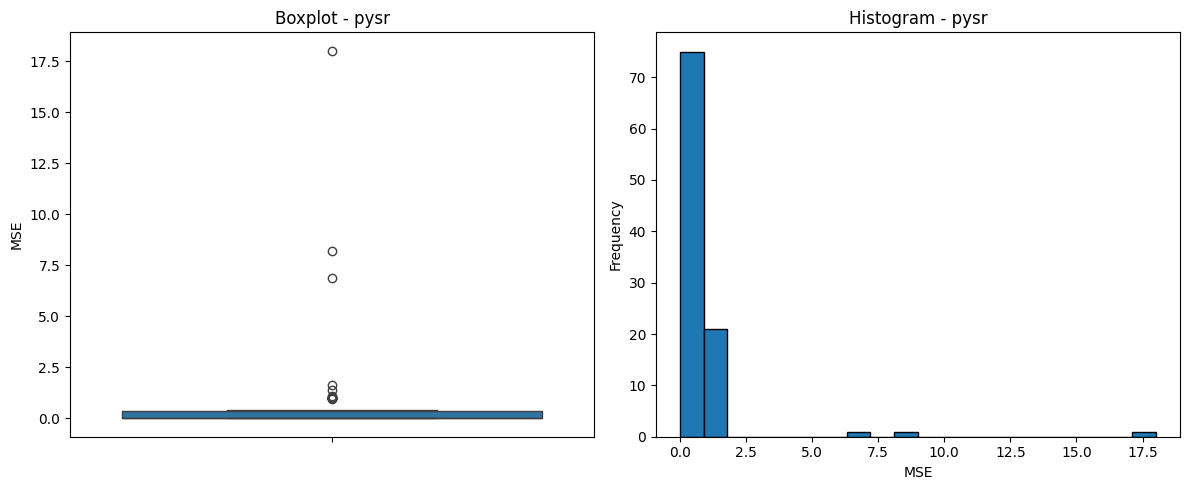

Solution: tir
Mean MSE: 3.8676
Median MSE: 0.0000



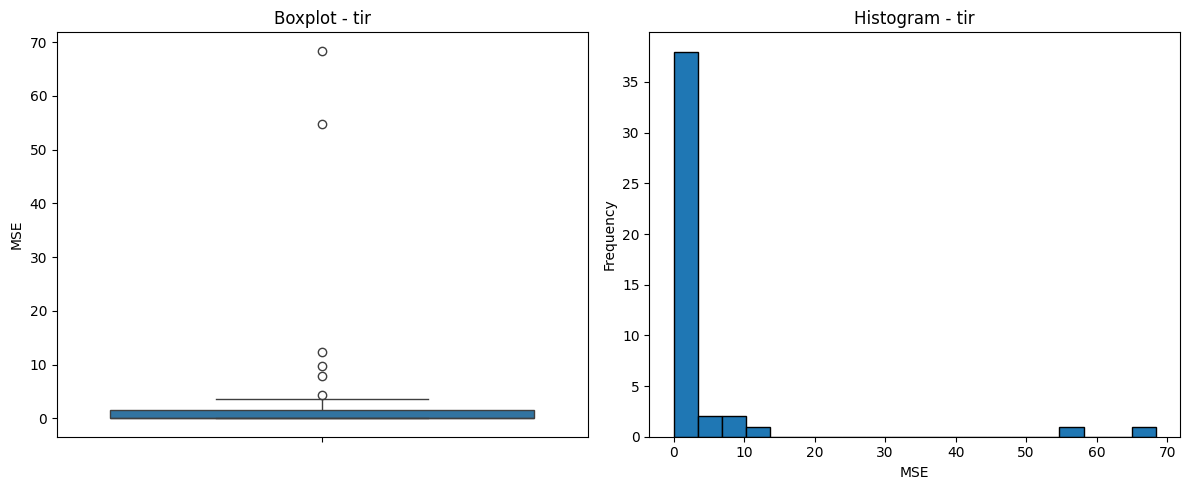

Solution: ivf-gplearn
Mean MSE: 9.1293
Median MSE: 1.0000



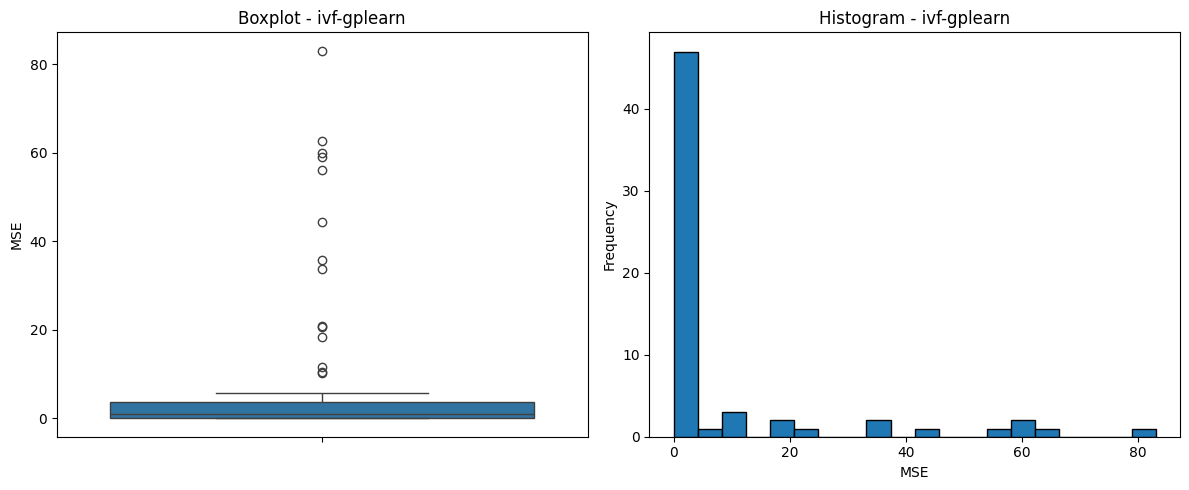

Solution: gplearn
Mean MSE: 9.0970
Median MSE: 1.0000



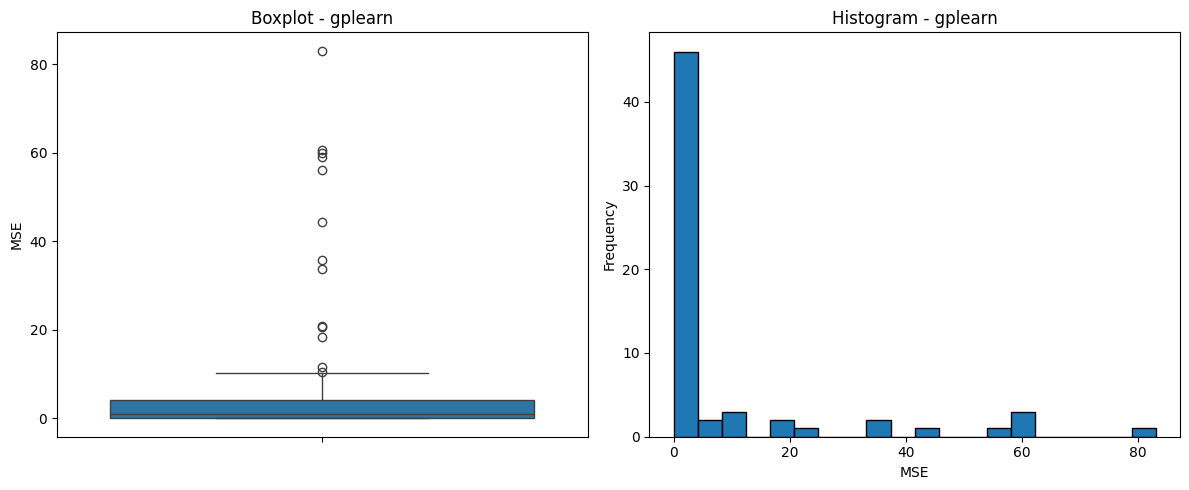

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
import glob

base_path = './results-2025-05'
plots_folder = "./plots"

if os.path.exists(plots_folder):
    shutil.rmtree(plots_folder)
os.makedirs(plots_folder)

solution_errors = {}

for solution_folder in os.listdir(base_path):
    solution_path = os.path.join(base_path, solution_folder)
    if os.path.isdir(solution_path):
        all_files = glob.glob(os.path.join(solution_path, '**/*.txt.csv'))
        mse_values = []

        for file in all_files:
            df = pd.read_csv(file, header=None, usecols=[0], names=['mse'], nrows=1)
            mse_values.extend(df['mse'].values)

        solution_errors[solution_folder] = mse_values

for solution, errors in solution_errors.items():
    errors = pd.Series(errors, dtype="float")
    errors = errors.replace([np.inf, -np.inf], np.nan).dropna()
    filtered_errors = errors[errors < 100]
    print(f"Solution: {solution}")
    print(f"Mean MSE: {filtered_errors.mean():.4f}")
    print(f"Median MSE: {filtered_errors.median():.4f}\n")

    plt.figure(figsize=(12, 5))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(y=filtered_errors)
    plt.title(f"Boxplot - {solution}")
    plt.ylabel("MSE")

    # Histogram
    plt.subplot(1, 2, 2)
    plt.hist(filtered_errors, bins=20, edgecolor='black')
    plt.title(f"Histogram - {solution}")
    plt.xlabel("MSE")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.savefig(os.path.join(plots_folder, f"{solution}-mse_plot.pdf"), format="pdf", bbox_inches="tight")
    plt.show()
